# Visualize VAE output

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from scipy.stats import norm

from models.vae import VAE
from utils.minority_dataset import load_celeba

In [2]:
data_folder = os.path.join('../', 'datasets', 'celeba')
image_folder = os.path.join(data_folder, 'img_align_celeba')
checkpoint_path = os.path.join('../', 'results', 'vae', 'celeba_v1', 'cp.ckpt')

In [3]:
# Load data.
input_dim = (128,128,3)
batch_size = 256

df = pd.read_csv(os.path.join(data_folder, 'list_attr_celeba.csv'))
data_flow = load_celeba(df, image_folder, input_dim[:2], batch_size)

Found 202599 validated image filenames.


In [4]:
# Load the model.
vae = VAE()
vae.load_weights(checkpoint_path)

2022-03-21 11:46:57.372617: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 11:46:57.433643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 11:46:57.433815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 11:46:57.434410: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Check the reconstructed faces

2022-03-21 11:46:58.975837: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


[]

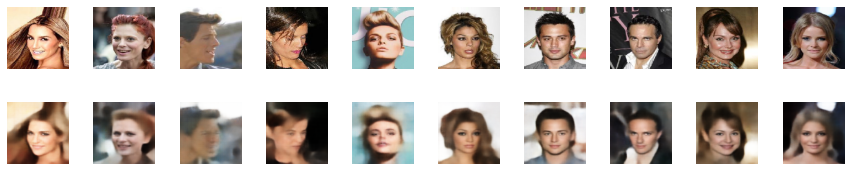

In [5]:
example_images = next(data_flow)[0]

z_mean, z_log_var = vae.encoder.predict(example_images)
z_points = vae.sample_z(z_mean, z_log_var)
reconst_images = vae.decoder.predict(z_points, batch_size=batch_size)

n_to_show = 10

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)
    
plt.plot()

## Check the latent space distributions

792/792 [==============================] - 109s 137ms/step


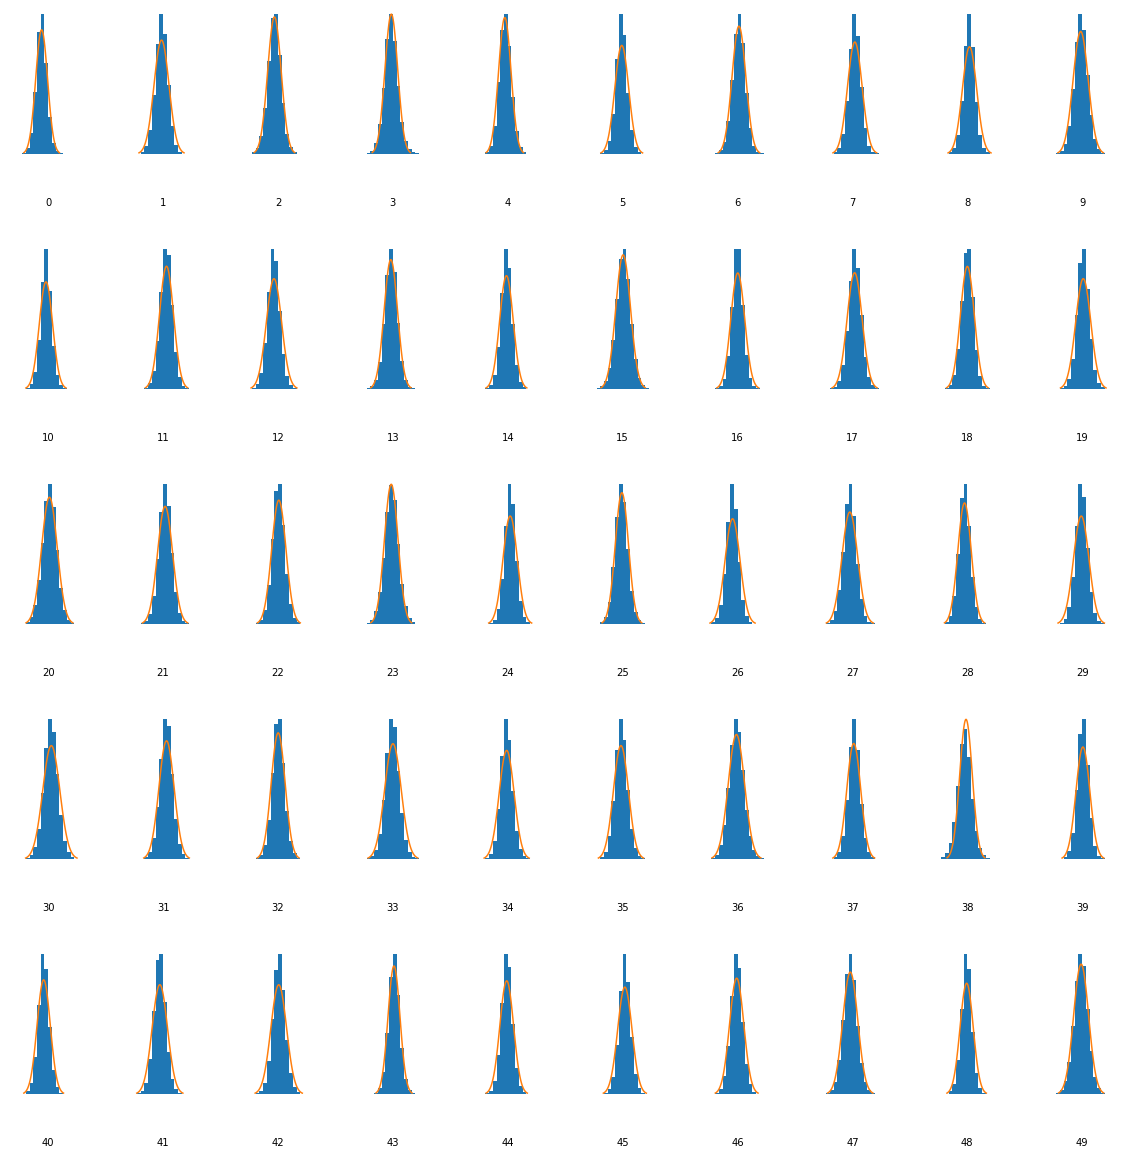

In [6]:
z_mean, z_log_var = vae.encoder.predict(data_flow, verbose = 1)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_mean[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()